<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Pooling Functions

Pooling functions reduce the spatial dimensions of an input (often an image or feature map) while retaining important features. The following table summarizes some common pooling operations used in deep learning:

| **Pooling Function**       | **Operation**                                                                                                               | **Notes** |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------|
| **Max Pooling**            | $Y_{ij} = \max_{(m,n) \in \text{window}} X_{ij}$   <br> (for each pooling window)                                             | Retains the maximum value. Often used to capture strong activations. |
| **Average Pooling**        | $Y_{ij} = \frac{1}{\text{window}} \sum_{(m,n) \in \text{window}} X_{ij}$   <br> (for each window)                              | Computes the average value over the window. |
| **Global Max Pooling**     | $Y = \max_{i,j} X_{ij}$                                                                                                        | Collapses spatial dimensions by taking the maximum value of the entire feature map. |
| **Global Average Pooling** | $Y = \frac{1}{HW} \sum_{i=1}^{H} \sum_{j=1}^{W} X_{ij}$                                                                      | Averages all elements in the feature map. |

These operations are essential for reducing the number of parameters and controlling overfitting in convolutional neural networks (CNNs).


Input Data 1 - Global Max Pooling Result: 252.04
Input Data 1 - Global Average Pooling Result: 120.56
Input Data 2 - Global Max Pooling Result: 252.04
Input Data 2 - Global Average Pooling Result: 120.56
Input Data 3 - Global Max Pooling Result: 252.04
Input Data 3 - Global Average Pooling Result: 120.56


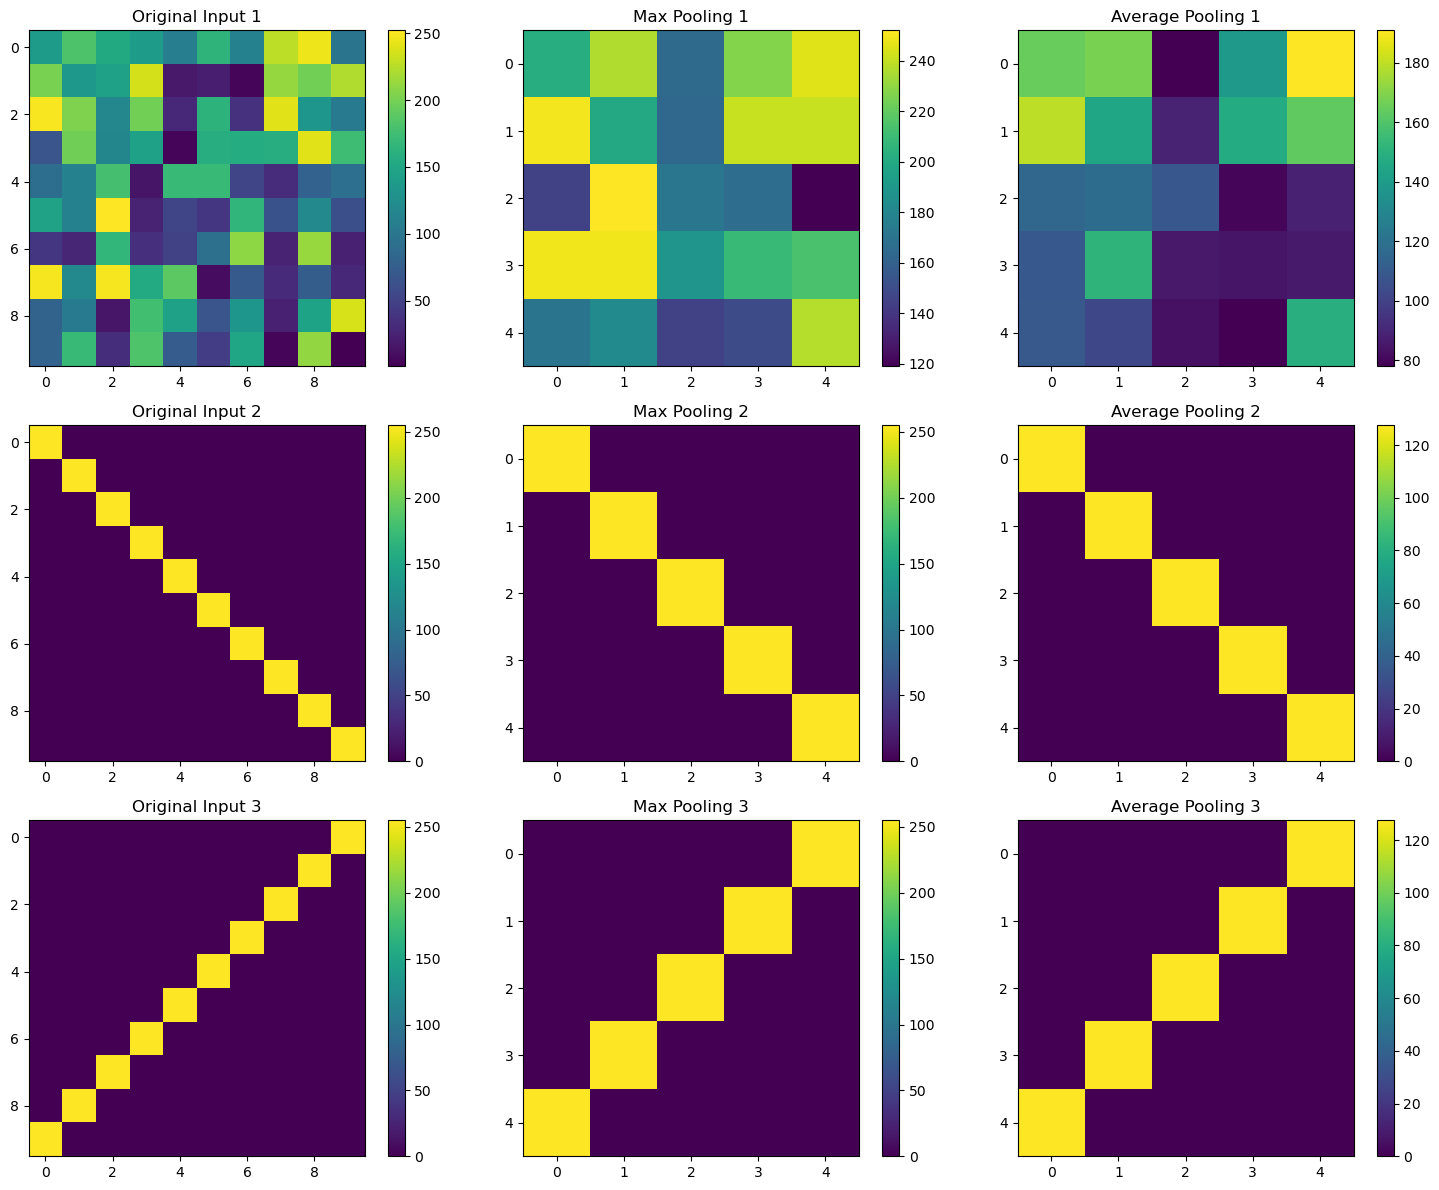

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def max_pool2d(input_array, pool_size=(2,2), stride=2):
    """
    Applies 2D max pooling on a 2D input array.
    """
    h, w = input_array.shape
    ph, pw = pool_size
    out_h = (h - ph) // stride + 1
    out_w = (w - pw) // stride + 1
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            w_start = j * stride
            window = input_array[h_start:h_start+ph, w_start:w_start+pw]
            output[i, j] = np.max(window)
    return output

def avg_pool2d(input_array, pool_size=(2,2), stride=2):
    """
    Applies 2D average pooling on a 2D input array.
    """
    h, w = input_array.shape
    ph, pw = pool_size
    out_h = (h - ph) // stride + 1
    out_w = (w - pw) // stride + 1
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            w_start = j * stride
            window = input_array[h_start:h_start+ph, w_start:w_start+pw]
            output[i, j] = np.mean(window)
    return output

def global_max_pool2d(input_array):
    """
    Applies global max pooling on a 2D input array, resulting in a single scalar output.
    """
    return np.max(input_array)

def global_avg_pool2d(input_array):
    """
    Applies global average pooling on a 2D input array, resulting in a single scalar output.
    """
    return np.mean(input_array)

# Create example 2D input arrays
np.random.seed(0)
input_data1 = np.random.rand(10, 10) * 255  # Random values scaled up for visualization
input_data2 = np.eye(10) * 255  # Identity matrix scaled up
input_data3 = np.fliplr(np.eye(10)) * 255
# make list of input_data
input_data = [input_data1, input_data2, input_data3]

# Apply pooling functions to each of the input data
max_pooled = [None] * len(input_data)
avg_pooled = [None] * len(input_data)
global_max = global_max_pool2d(input_data1)
global_avg = global_avg_pool2d(input_data1)
for i, data in enumerate(input_data):
    max_pooled[i] = max_pool2d(data, pool_size=(2,2), stride=2)
    avg_pooled[i] = avg_pool2d(data, pool_size=(2,2), stride=2)
    print(f"Input Data {i+1} - Global Max Pooling Result: {global_max:.2f}")
    print(f"Input Data {i+1} - Global Average Pooling Result: {global_avg:.2f}")



# Plot the original input and pooled outputs for the first input data
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

im0 = axes[0, 0].imshow(input_data[0], cmap='viridis')
axes[0, 0].set_title('Original Input 1')
fig.colorbar(im0, ax=axes[0, 0])

im1 = axes[0, 1].imshow(max_pooled[0], cmap='viridis')
axes[0, 1].set_title('Max Pooling 1')
fig.colorbar(im1, ax=axes[0, 1])

im2 = axes[0, 2].imshow(avg_pooled[0], cmap='viridis')
axes[0, 2].set_title('Average Pooling 1')
fig.colorbar(im2, ax=axes[0, 2])

im3 = axes[1, 0].imshow(input_data[1], cmap='viridis')
axes[1, 0].set_title('Original Input 2')
fig.colorbar(im3, ax=axes[1, 0])

im4 = axes[1, 1].imshow(max_pooled[1], cmap='viridis')
axes[1, 1].set_title('Max Pooling 2')
fig.colorbar(im4, ax=axes[1, 1])

im5 = axes[1, 2].imshow(avg_pooled[1], cmap='viridis')
axes[1, 2].set_title('Average Pooling 2')
fig.colorbar(im5, ax=axes[1, 2])

im6 = axes[2, 0].imshow(input_data[2], cmap='viridis')
axes[2, 0].set_title('Original Input 3')
fig.colorbar(im6, ax=axes[2, 0])

im7 = axes[2, 1].imshow(max_pooled[2], cmap='viridis')
axes[2, 1].set_title('Max Pooling 3')
fig.colorbar(im7, ax=axes[2, 1])

im8 = axes[2, 2].imshow(avg_pooled[2], cmap='viridis')
axes[2, 2].set_title('Average Pooling 3')
fig.colorbar(im8, ax=axes[2, 2])

plt.tight_layout()
plt.show()


### Additional Notes

- **Max Pooling:** Extracts the maximum value within each window, preserving prominent features.
- **Average Pooling:** Computes the average value within each window, which can help smooth the input.
- **Global Pooling:** Collapses the entire spatial dimension (e.g., a feature map) into a single value.

These pooling operations are essential steps in convolutional neural networks (CNNs) to reduce spatial dimensions and the number of parameters. They also help in achieving translation invariance.
